# CHEMICAL REACTIONS IN BIOLOGICAL SYSTEMS

<img src=https://wou.edu/chemistry/files/2018/12/cellular-drug-targets.png alt="image info" />

## OBJECTIVE
The objective of this task is to build as good a model as possible so as to relate molecular information, to an actual biological response.

## DATA
* Each row in this data set represents a molecule. 
* The first column contains experimental data describing an actual biological response; the molecule was seen to elicit this response (1), or not (0). 
* The remaining columns represent molecular descriptors (d1 through d1776), these are calculated properties that can capture some of the characteristics of the molecule - for example size, shape, or elemental constitution. 
* The descriptor matrix has been normalized.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df_train = pd.read_csv("resources/data/train.csv")
df_test = pd.read_csv("resources/data/test.csv")

In [3]:
df_train.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


As per the project brief, the dependent variable is the `Activity` column. the rest of the 1776 columns are the independent variables.

## DATA CLEANSING

### How Normal is the Data?

In [28]:
# checking the maximum and minimum values for the variables
descr_df = df_train.describe()

In [29]:
descr_df

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
count,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,...,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000
mean,0.542255,0.076948,0.592436,0.068142,0.038990,0.212112,0.686653,0.274713,0.455133,0.749517,...,0.026926,0.014663,0.013863,0.021861,0.015196,0.016796,0.012263,0.011730,0.020261,0.011197
std,0.498278,0.079989,0.105860,0.078414,0.115885,0.102592,0.078702,0.090017,0.162731,0.071702,...,0.161889,0.120215,0.116938,0.146249,0.122348,0.128522,0.110074,0.107683,0.140911,0.105236
min,0.000000,0.000000,0.282128,0.000000,0.000000,0.002630,0.137873,0.006130,0.000000,0.275590,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.033300,0.517811,0.000000,0.000000,0.138118,0.625627,0.207374,0.378062,0.707339,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.066700,0.585989,0.050000,0.000000,0.190926,0.674037,0.277845,0.499942,0.738961,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.100000,0.668395,0.100000,0.000000,0.261726,0.740663,0.335816,0.569962,0.788177,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,0.964381,0.950000,1.000000,1.000000,0.994735,0.790831,0.989870,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
# checking if trully all the columns were normalised to [0,1]
descr_df_transposed = descr_df.transpose()
max = descr_df_transposed['max'][descr_df_transposed['max'] > 1].count()
min = descr_df_transposed['min'][descr_df_transposed['min'] < 0].count()
print ("Number of features having values more than 1: ", max)
print ("Number of features having values less than 0: ", min)

Number of features having values more than 1:  0
Number of features having values less than 0:  0


In [53]:
descr_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, count to max
Columns: 1777 entries, Activity to D1776
dtypes: float64(1777)
memory usage: 111.4+ KB


Observations:
* All the dependent features are of type `Float`.
* All the features have been normalised to `[0,1]`.
* The mean of several features shown is not the expected value of 0.5. This is an indication of presence of outliers.
* Some features seem to have only two values: `0`, and `1`. This is because the `min`, `25%`, `50%`, `75%` and `max` values are either `0` or `1`.

### Sample Features for visualisation of trend, spread,...

## EXPLORATORY DATA ANALYSIS

### Binary Features

In [78]:
# checking how many column have binary values
binary_df = df_train.nunique().reset_index()
# a column that has two unique values is a binary column
binary_columns = list(binary_df[binary_df[0] == 2]['index'])
print("Columns having binary values are: ", len(binary_columns))
print("A sample of the 836 binary columns: ", binary_columns[:10], " ...")

# checking to see if the binary values are 1 and 0:
count = 0
uniquebinary = []
for col in binary_columns:
    if df_train[col].max() ==1 and df_train[col].min() == 0:
        count = count + 1
    else:
        uniquebinary.append(col)
print ("Number of binary columns whose values are 1 and 0 are:", count,
        "and they constitute ", round((count*100/len(binary_columns)),2),"% of the binary columns.")
if len(uniquebinary) > 0:
    print ("Binary columns whose values are not 1 and 0 are: ", uniquebinary)

Columns having binary values are:  836
A sample of the 836 binary columns:  ['Activity', 'D23', 'D27', 'D28', 'D51', 'D72', 'D94', 'D170', 'D568', 'D823']  ...
Number of binary columns whose values are 1 and 0 are: 835 and they constitute  99.88 % of the binary columns.
Binary columns whose values are not 1 and 0 are:  ['D823']


In [79]:
# checking the composition of the identified columns()
df_train['D823'].describe()

count    3751.000000
mean        0.000044
std         0.002721
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.166667
Name: D823, dtype: float64

As the feature `D823` has a value (of type `float`) that is `not equal to 1` in addition to zero, it will not be considered as being a binary feature. These are possibly outputs of data vectorisation and one-hot encoding that was done before the data was availed to us.

In [85]:
# removing the identified column and having a purely [0,1] binary columns list
binary_columns = [x for x in binary_columns if x not in uniquebinary]
len(binary_columns)

835

As the dependent variable is a binary feature, binary classification algorithms will be considered. These will include:
1. Naive Bayes
2. Logistic Regression
3. K-Nearest Neighbours
4. Support Vector Machine
5. Decision Tree
6. Bagging Decision Tree (Ensemble Learning I)
7. Boosted Decision Tree (Ensemble Learning II)
8. Random Forest (Ensemble Learning III)
9. Voting Classification (Ensemble Learning IV)
10. Neural Network (Deep Learning)

They are described here: https://towardsdatascience.com/top-10-binary-classification-algorithms-a-beginners-guide-feeacbd7a3e2

### Outliers

Kurtosis is a measure of the “tailedness” of the probability distribution. A standard normal distribution has kurtosis of 3 and is recognized as mesokurtic. An increased kurtosis (>3) can be visualized as a thin “bell” with a high peak whereas a decreased kurtosis corresponds to a broadening of the peak and “thickening” of the tails. Kurtosis >3 is recognized as leptokurtic and <3 as platykurtic (lepto=thin; platy=broad).

For the task, we will remove the binary columns from the dataset, as these should not be evaluated for outliers.

In [91]:
# extracting columns for continuous features
columns = list(df_train.columns)
normal_columns = [x for x in columns if x not in binary_columns]
normal_columns.append('Activity')
df = df_train[normal_columns]

In [ ]:
### employ violinplots on a sample of the data

In [92]:
df.kurtosis()

D1           19.354861
D2           -0.277627
D3            8.935350
D4           20.548969
D5            4.192214
               ...    
D948        201.866125
D949          2.952185
D950         17.122472
D951         12.860410
Activity     -1.972255
Length: 943, dtype: float64

### kurtosis plotting

In [93]:
# application of kurtosis to identify possibility of outliers
# kurtosis values greater than 3
kurt = df.kurtosis()
count = 0
for i in kurt:
    if i > 3:
        count = count + 1 
print ("Number of features that have outliers: ",count)

Number of features that have outliers:  882


### Correlation

In [100]:
# checking correlation of the variables
correlation = df_train.corr()

In [101]:
# correlation of independent variables with the dependent variable, `Activity`
top20 = correlation['Activity'].sort_values()[:10].append(correlation['Activity'].sort_values()[-10:])

C:\Users\Win10\AppData\Local\Temp\ipykernel_9660\3277050280.py:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top20 = correlation['Activity'].sort_values()[:10].append(correlation['Activity'].sort_values()[-10:])


In [102]:
# getting the features that have the 
# top 20 highest correlation values with the `Activity` variable
top20

D217       -0.233387
D87        -0.223081
D187       -0.198590
D158       -0.197721
D60        -0.180185
D61        -0.174588
D173       -0.169300
D175       -0.162607
D129       -0.153477
D103       -0.151922
D660        0.204864
D209        0.210154
D607        0.210270
D146        0.213311
D659        0.226049
D747        0.226468
D182        0.228664
D469        0.268601
D27         0.472340
Activity    1.000000
Name: Activity, dtype: float64

### Multi-Collinearity

Read: https://www.analyticsvidhya.com/blog/2021/03/multicollinearity-in-data-science/, https://towardsdatascience.com/targeting-multicollinearity-with-python-3bd3b4088d0b

It describes the occurrence of two exploratory variables in a linear regression model that is found to be correlated through adequate analysis and a predetermined degree of accuracy.

Multicollinearity does not have a massive bearing on a model’s predictive capabilities. It is important when building models to gain more insight into the nature of the predictive features.

### Imbalanced Dependent Variable

read more: https://machinelearningmastery.com/what-is-imbalanced-classification/

In [127]:
df_train.groupby(by = 'Activity').count()

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
Activity,,,,,,,,,,,,,,,,,,,,,
0,1717,1717,1717,1717,1717,1717,1717,1717,1717,1717,...,1717,1717,1717,1717,1717,1717,1717,1717,1717,1717
1,2034,2034,2034,2034,2034,2034,2034,2034,2034,2034,...,2034,2034,2034,2034,2034,2034,2034,2034,2034,2034


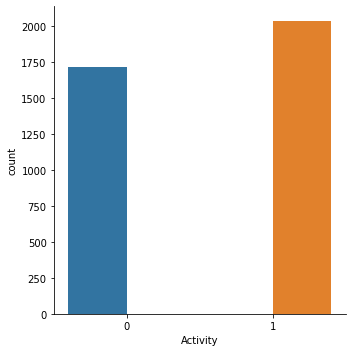

In [130]:
import seaborn as sns
# visual representation of the balance of the binary features
sns.catplot(x='Activity',hue='Activity',data=df,kind="count")

It can be seen that:
* Binary 0: 1,717 observations
* Binary 1: 2,034 observations

Therefore, the binaries in the observation are approximately balanced, with slightly more Binary 1 observations (317 observations, 18% difference over the lower value).

No more action on imbalance is required.